In [1]:
import sys

sys.path.append("..")

from src.auth.aurora import get_portal_client

In [2]:
portal_client = get_portal_client()

In [3]:
visit_df = portal_client.query_to_pandas(
    """SELECT  
        TIMESTAMPDIFF(HOUR, start, end) AS hour_diff,
        COUNT(*) AS cnt
    FROM topaz.api_visits AS v
    WHERE start >= '2025-01-01'
    AND EXISTS (
        SELECT 1
        FROM api_service_tasks_record AS str
        WHERE str.visit_id = v.id
    )
    GROUP BY hour_diff
    HAVING hour_diff >= 0
    ORDER BY hour_diff;"""
).set_index("hour_diff")

In [4]:
mode_change_df = portal_client.query_to_pandas(
    """SELECT
        TIMESTAMPDIFF(HOUR, created_at, ended_at) AS hour_diff,
        COUNT(*) AS cnt
    FROM topaz.api_mode_changes AS m
    WHERE created_at >= '2025-01-01'
    AND EXISTS (
        SELECT 1
        FROM api_service_tasks_record AS str
        WHERE str.mode_change_id = m.id
    )
    GROUP BY hour_diff
    HAVING hour_diff >= 0
    ORDER BY hour_diff;
    """
).set_index("hour_diff")

In [5]:
new_index = list(set(visit_df.index) | set(mode_change_df.index))

In [6]:
visit_df = visit_df.reindex(new_index).fillna(0)
mode_change_df = mode_change_df.reindex(new_index).fillna(0)

In [7]:
df = (visit_df + mode_change_df).sort_index()

In [8]:
import matplotlib.pyplot as plt

In [9]:
df['cumulative_sum'] = df['cnt'].cumsum()
df['cumulative_pct'] = (df['cumulative_sum'] / df['cnt'].sum()) * 100

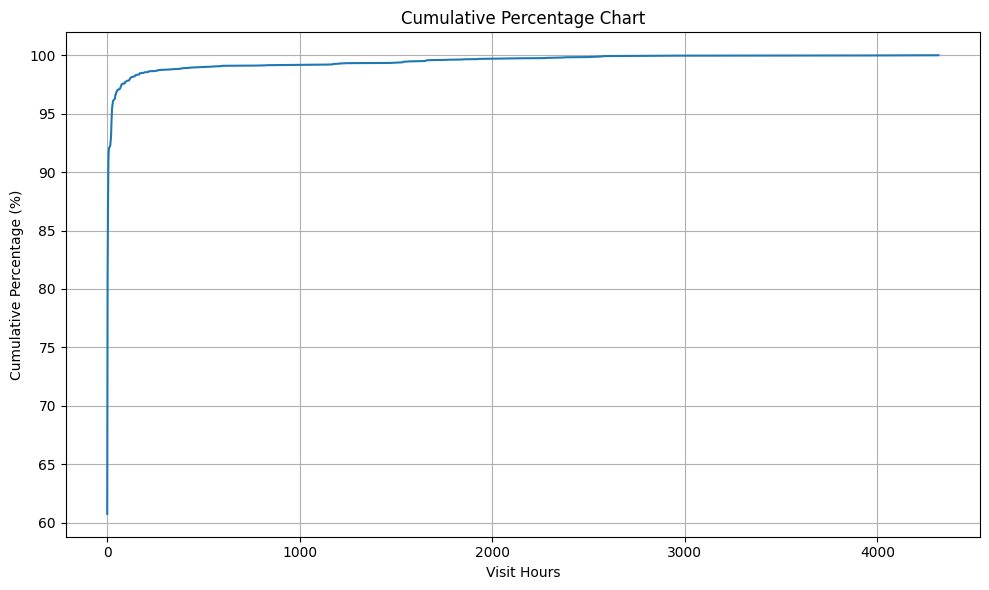

In [10]:
# Plot the cumulative percentage chart
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_pct'])
plt.title('Cumulative Percentage Chart')
plt.xlabel('Visit Hours')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
df.iloc[0:30]

,cnt,cumulative_sum,cumulative_pct
hour_diff,,,
0,3507.0,3507.0,60.758836
1,790.0,4297.0,74.445599
2,365.0,4662.0,80.769231
3,234.0,4896.0,84.823285
4,121.0,5017.0,86.919612
5,127.0,5144.0,89.119889
6,92.0,5236.0,90.713791
7,47.0,5283.0,91.528067
8,18.0,5301.0,91.839917


In [12]:
df[df["cumulative_pct"] >= 99]

,cnt,cumulative_sum,cumulative_pct
hour_diff,,,
527,1.0,5715.0,99.012474
548,1.0,5716.0,99.029799
552,1.0,5717.0,99.047124
592,1.0,5718.0,99.064449
593,1.0,5719.0,99.081774
602,1.0,5720.0,99.099099
768,1.0,5721.0,99.116424
815,1.0,5722.0,99.133749
834,1.0,5723.0,99.151074


In [13]:
527 / 24

21.958333333333332